In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
ls

In [101]:
#Fetching Kaggle dataset (Please edit the storage directory to suit your project storage location)
import json
token = {"username":"gilokip","key":"f20e33d8a0e0cedbdc782dd0491584b4"}
with open(r'C:\Users\FREDDIE\Downloads\kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!kaggle competitions download -c titanic

In [2]:
import pandas as pd
import zipfile

In [ ]:
#unzipping data
with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\FREDDIE\Desktop\Kaggle\Data")

In [18]:
#reading train data
train_data = pd.read_csv(r'C:\Users\FREDDIE\Desktop\Kaggle\Data\train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#Dropping undesired columns in Training data
train_data.drop (['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [20]:
#reading test data
test_data = pd.read_csv(r'C:\Users\FREDDIE\Desktop\Kaggle\Data\test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
#We then drop the undesired columns
test_data.drop (['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [4]:
#finding average age of passengers (basic arithmentic operations)
average1 = train_data['Age'].mean()

print("Average age of people who survived:" +str(average1))

Average age of people who survived:29.69911764705882


In [62]:
#Importing analytic packages
import matplotlib as plt
import sklearn
import numpy as np
import xgboost as xgb

from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier

In [22]:
#Identifying the data keys on the columns
print (test_data.keys())

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


In [23]:
#Printing sample data of one column
print (test_data.Age)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64


In [25]:
#Running descriptive statistics on the test data
test_data.describe()

,Pclass,Age,SibSp,Parch
count,418.000000,332.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344
std,0.841838,14.181209,0.896760,0.981429
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000
75%,3.000000,39.000000,1.000000,0.000000
max,3.000000,76.000000,8.000000,9.000000


In [26]:
#Running descriptive statistics on the train data
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [27]:
#Identifying the data types on each column
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [28]:
#Finding unique values within the Sex column and determine if they are categorical
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
#Identifying the values in the Age column
train_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [34]:
#Converting the Age column to numeric (optional in this case)
#train_data['Age'] = pd.to_numeric(train_data['Age'])

In [47]:
#Identifying missing values in the Age column
len(train_data.loc[train_data['Age'] == ' '])

0

In [48]:
#Separating data into independent and dependen varible (X, y)
X =train_data.drop('Survived', axis=1).copy()
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [49]:
y = train_data['Survived'].copy()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
X.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
dtype: object

In [57]:
#One-hot encoding the Sex column
X_encoded = pd.get_dummies(X, columns=['Sex'])
X_encoded.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,22.0,1,0,0,1
1,1,38.0,1,0,1,0
2,3,26.0,0,0,1,0
3,1,35.0,1,0,1,0
4,3,35.0,0,0,0,1


In [58]:
#Checking if the dependent variable has two unique values
y.unique()

array([0, 1], dtype=int64)

In [60]:
sum(y)/len(y)

0.3838383838383838

In [63]:
X_train, X_test, y_train, y_test = train_test_split (X_encoded, y, random_state=42, stratify=y)

In [64]:
sum(y_train)/len(y_train)

0.38323353293413176

In [65]:
sum(y_test)/len(y_test)

0.38565022421524664

In [73]:
#Training our model
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42, learning_rate=0.1,
    n_estimators=200,
    max_depth=8,
    min_child_weight=1,
    gamma=0.25,
    reg_lambda=10,
    subsample=0.9,
    colsample_bytree=0.5,
    scale_pos_weight=3)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.52873
[1]	validation_0-aucpr:0.75887
[2]	validation_0-aucpr:0.76929
[3]	validation_0-aucpr:0.77707
[4]	validation_0-aucpr:0.75734
[5]	validation_0-aucpr:0.77667
[6]	validation_0-aucpr:0.78290
[7]	validation_0-aucpr:0.79116
[8]	validation_0-aucpr:0.79175
[9]	validation_0-aucpr:0.79726
[10]	validation_0-aucpr:0.79364
[11]	validation_0-aucpr:0.79679
[12]	validation_0-aucpr:0.79670
[13]	validation_0-aucpr:0.79736
[14]	validation_0-aucpr:0.79742
[15]	validation_0-aucpr:0.79794
[16]	validation_0-aucpr:0.79875
[17]	validation_0-aucpr:0.79532
[18]	validation_0-aucpr:0.79621
[19]	validation_0-aucpr:0.79674
[20]	validation_0-aucpr:0.79582
[21]	validation_0-aucpr:0.79656
[22]	validation_0-aucpr:0.79736
[23]	validation_0-aucpr:0.79733
[24]	validation_0-aucpr:0.79722
[25]	validation_0-aucpr:0.79782


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=3, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

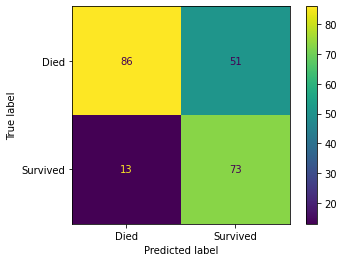

In [74]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format = 'd', display_labels=["Died", "Survived"])

In [75]:
#predicting accuracy
y_predict = clf_xgb.predict(X_test)
y_train_predict = clf_xgb.predict(X_train)

In [77]:
print(f'Training accuracy:        {accuracy_score(y_train,  y_train_predict)*100: .2f}%')
print(f'Validation accuracy:      {accuracy_score(y_test, y_predict)*100: .2f}%')

Training accuracy:         77.25%
Validation accuracy:       71.30%


In [78]:
test_data

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [81]:
#One-hot encoding the Sex column
Test_encoded = pd.get_dummies(test_data, columns=['Sex'])
Test_encoded.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,34.5,0,0,0,1
1,3,47.0,1,0,1,0
2,2,62.0,0,0,0,1
3,3,27.0,0,0,0,1
4,3,22.0,1,1,1,0


In [83]:
Test_encoded

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,34.5,0,0,0,1
1,3,47.0,1,0,1,0
2,2,62.0,0,0,0,1
3,3,27.0,0,0,0,1
4,3,22.0,1,1,1,0
...,...,...,...,...,...,...
413,3,NaN,0,0,0,1
414,1,39.0,0,0,1,0
415,3,38.5,0,0,0,1
416,3,NaN,0,0,0,1


In [86]:
#Encoding test data
Test_encoded = Test_encoded.astype(float)
pred = clf_xgb.predict(Test_encoded)
pred = pred.astype(np.int16)

In [98]:
#Saving file for submission
submission = pd.read_csv(r'C:\Users\FREDDIE\Desktop\Kaggle\Data\gender_submission.csv')
submission['Survived'] = pred
submission.to_csv('submission.csv', index=False)

In [99]:
#Displaying the first five rows of the table
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
